<a href="https://colab.research.google.com/github/nhlong1512/IS403.N21/blob/main/Lab4/SVR_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('fivethirtyeight')


In [199]:
#read in the data
dff = pd.read_csv('vnindex.csv')
data = dff.loc[::-1].reset_index(drop=True)
#set the date as the index
# data = data.set_index(pd.DatetimeIndex(data['Date']))
#show the data
data

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,4/1/2022,1525.58,"1,508.55","1,526.69","1,507.19",891.30K,1.82%
1,5/1/2022,1522.50,"1,525.58","1,535.82","1,522.50",1.06M,-0.20%
2,6/1/2022,1528.57,"1,522.50","1,536.24","1,518.18",1.13M,0.40%
3,7/1/2022,1528.48,"1,534.10","1,534.52","1,524.96",1.03M,-0.01%
4,10/1/2022,1503.71,"1,528.48","1,536.45","1,503.71",1.38M,-1.62%
...,...,...,...,...,...,...,...
330,8/5/2023,1053.44,"1,040.31","1,053.44","1,040.31",655.53K,1.26%
331,9/5/2023,1055.03,"1,055.42","1,058.71","1,052.68",526.92K,0.15%
332,10/5/2023,1057.26,"1,055.62","1,058.67","1,053.34",678.77K,0.21%
333,11/5/2023,1057.24,"1,058.26","1,063.69","1,056.72",674.32K,0.00%


In [200]:
future_day= 1

In [201]:
#Create a new column
data[str(future_day)+'_Day_Price_Forecast'] = data[["Lần cuối"]].shift(-future_day)
#Show the data
data[['Lần cuối', str(future_day)+'_Day_Price_Forecast']]
#data



,Lần cuối,1_Day_Price_Forecast
0,1525.58,1522.50
1,1522.50,1528.57
2,1528.57,1528.48
3,1528.48,1503.71
4,1503.71,1492.31
...,...,...
330,1053.44,1055.03
331,1055.03,1057.26
332,1057.26,1057.24
333,1057.24,1064.64


In [202]:
X = np.array(data[['Lần cuối']])
X = X[:data.shape[0] - future_day]

In [203]:
Y = np.array(data[str(future_day)+'_Day_Price_Forecast'])
Y = Y[:- future_day]
print(Y)

[1522.5  1528.57 1528.48 1503.71 1492.31 1510.51 1496.05 1496.02 1452.84
 1438.94 1442.79 1465.3  1472.89 1439.71 1479.58 1481.58 1470.76 1478.96
 1497.66 1500.99 1505.38 1506.79 1501.71 1471.96 1492.75 1492.1  1507.99
 1504.84 1510.84 1503.47 1512.3  1494.85 1498.89 1490.13 1498.78 1485.52
 1505.   1505.33 1499.05 1473.71 1473.74 1479.08 1466.54 1446.25 1452.74
 1459.33 1461.34 1469.1  1494.95 1503.78 1502.34 1498.26 1498.5  1483.18
 1497.76 1490.51 1492.15 1516.44 1524.7  1520.03 1522.9  1502.35 1482.
 1455.25 1477.2  1472.12 1458.56 1432.6  1406.45 1384.72 1370.21 1379.23
 1310.92 1341.34 1353.77 1350.99 1366.8  1348.68 1360.68 1329.26 1269.62
 1293.56 1301.53 1238.84 1182.77 1171.95 1228.37 1240.76 1241.64 1240.71
 1218.81 1233.38 1268.43 1268.57 1285.45 1293.92 1292.68 1299.52 1288.62
 1287.98 1290.01 1291.35 1307.91 1307.8  1284.08 1227.04 1230.31 1213.93
 1236.63 1217.3  1180.4  1172.47 1169.27 1188.88 1185.48 1202.82 1218.1
 1218.09 1197.6  1198.9  1195.53 1181.29 1149.61 1166.

In [204]:
#Split the data
#Chia tập dữ liệu thành tập train, test và predict theo tỷ lệ 7-1-2
X_train = X[:int(X.shape[0]*0.7)]
Y_train = Y[:int(Y.shape[0]*0.7)]

X_val = X[int(X.shape[0]*0.7):int(X.shape[0]*0.8)]
Y_val = Y[int(Y.shape[0]*0.7):int(Y.shape[0]*0.8)]

X_test = X[int(X.shape[0]*0.8):]
Y_test = Y[int(Y.shape[0]*0.8):]



In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_pred = scaler.transform(data[['Lần cuối']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, randint
svr = SVR()
# Tạo dictionary chứa các giá trị hyperparameters để thử nghiệm
param_grid = {'C':[0.01, 0.1, 1, 10 ,100],
              'gamma': [0.01, 0.1, 1, 10 ,100],
              'kernel': ['linear', 'rbf','sigmoid']}

In [207]:
X_Grid = np.concatenate([X_train_scaled,X_val_scaled])
Y_Grid = np.concatenate([Y_train,Y_val])

In [208]:
# Tạo một đối tượng GridSearchCV với model là SVR, dictionary chứa các hyperparameters, và 5 fold cross validation
grid_search = GridSearchCV(svr, param_grid, refit=True, cv=8, scoring='neg_mean_squared_error')



In [209]:
# Huấn luyện đối tượng GridSearchCV
grid_search.fit(X_Grid, Y_Grid)

GridSearchCV(cv=8, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [210]:
# In ra bộ hyperparameters tốt nhất
best_para=grid_search.best_params_
kernel_best=best_para['kernel']
C_best=best_para['C']
gamma_best=best_para['gamma']
print(best_para)

{'C': 100, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [211]:
grid_search.best_score_


-340.97563101037645

In [212]:
from sklearn.svm import SVR
svr_linear = SVR(kernel=kernel_best, C= C_best, gamma= gamma_best)
svr_linear.fit(X_train_scaled, Y_train)

SVR(C=100, gamma=0.1, kernel='sigmoid')

In [213]:
svr_linear_confidence = svr_linear.score(X_train_scaled, Y_train)
print('svr_rbf accuracy: ', svr_linear_confidence)

svr_rbf accuracy:  0.9881161054293123


In [214]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
X_val_pred = svr_linear.predict(X_val_scaled)

val_mse = mean_squared_error(Y_val, X_val_pred)
val_rmse = np.sqrt(val_mse)

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_val, X_val_pred)

print("MAPE:", mape)
print("RMSE:", val_rmse)

MAPE: 0.009325124009181488
RMSE: 13.980744536379946


In [215]:
X_test_pred = svr_linear.predict(X_test_scaled)
print(X_test_pred)

[1078.62332701 1090.56822104 1067.51390998 1073.77846441 1065.73776736
 1057.17811753 1045.823161   1040.87698663 1050.22550856 1060.10844276
 1061.10840484 1088.0083092  1083.61921113 1056.17879662 1055.57144683
 1041.77597056 1023.91187342 1027.25382874 1042.74351527 1039.87068594
 1027.3415471  1029.690989   1040.0953782  1051.1846817  1057.81502539
 1054.92498034 1054.72909511 1042.33302157 1063.93269487 1049.44262603
 1047.23154935 1025.71412159 1034.81262986 1042.73374126 1047.19242282
 1048.84574839 1054.19044367 1056.18859309 1058.18740233 1061.23586258
 1066.3363016  1080.71761699 1079.90145595 1082.2715402  1072.4916789
 1071.31316483 1067.03302702 1071.06766775 1071.05784806 1066.00268541
 1054.81724267 1055.7183807  1056.90377776 1050.9889194  1051.25320004
 1045.05064968 1043.53526551 1037.17508445 1042.98787086 1041.84437738
 1051.12595233 1042.80215965 1042.5089438  1055.35595029 1056.9135754
 1059.09884151 1059.07923924]


In [216]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, X_test_pred, squared= False)
rmse

10.151146291936461

In [217]:
from sklearn.metrics import mean_absolute_percentage_error

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_test, X_test_pred)
print("MAPE:", mape)

MAPE: 0.0071225496154239875


Dự đoán

In [218]:
X_test_pred = svr_linear.predict(X_test_scaled)
# print(X_test_pred)

In [219]:
last_30_days = svr_linear.predict(X_pred[-future_day:])
last_30_days= last_30_days.reshape(-1,1)
print(last_30_days)

[[1066.3363016]]


In [220]:
# 13. Dự báo 30 ngày tiếp theo
# Khởi tạo danh sách đầu vào x_input từ tập dữ liệu test
x_input = Y_test.reshape(-1, 1)
x_input = scaler.transform(x_input)
# Dự đoán giá cho 30 ngày tiếp theo
i=0
lst_output = []
for i in range(30):
    # Dự đoán giá cho ngày tiếp theO
    
    yhat = svr_linear.predict(x_input)
    print("{} day output {}".format(i,yhat[0]))
    # Lưu giá dự đoán vào danh sách kết quả
    lst_output.append(yhat[0])
    
    # Cập nhật đầu vào x_input bằng cách đẩy dự đoán vào cuối và cắt bớt phần tử đầu tiên
    yhat = yhat.reshape(-1,1)
    yhat = scaler.transform(yhat)
    x_input = np.append(x_input[1:], yhat[0]).reshape(-1, 1)
    i=i+1

0 day output 1090.5682210359446
1 day output 1067.513909984902
2 day output 1073.7784644101807
3 day output 1065.737767360171
4 day output 1057.178117534242
5 day output 1045.823160999735
6 day output 1040.8769866270018
7 day output 1050.2255085570919
8 day output 1060.1084427647904
9 day output 1061.1084048377897
10 day output 1088.008309202743
11 day output 1083.6192111268892
12 day output 1056.1787966233646
13 day output 1055.5714468278397
14 day output 1041.7759705634205
15 day output 1023.9118734150444
16 day output 1027.253828740414
17 day output 1042.7435152686257
18 day output 1039.8706859362542
19 day output 1027.3415471000299
20 day output 1029.690988995153
21 day output 1040.095378204508
22 day output 1051.1846816994725
23 day output 1057.8150253919123
24 day output 1054.924980340671
25 day output 1054.7290951104465
26 day output 1042.3330215656968
27 day output 1063.9326948732596
28 day output 1049.4426260300083
29 day output 1047.2315493508936


In [221]:
Y_test_pred= Y_test.reshape(-1,1)

In [222]:
X_train_pred = svr_linear.predict(X_train_scaled)

In [223]:
# Tạo biểu đồ
actual = np.arange(len(data['Lần cuối']))
Predict = np.arange(len(data['Lần cuối']), len(data['Lần cuối']) + len(last_30_days))

#index X_train
index_X_train = np.arange(len(X_train_pred)+1)
#index X_val
index_X_val = np.arange(len(X_train_pred), len(X_train_pred) + len(X_val_pred)+1)

#index X_test
index_X_test = np.arange(len(X_train_pred) + len(X_val_pred),len(X_train_pred) + len(X_val_pred) + len(X_test_pred))

In [224]:
X_train_pred= X_train_pred.reshape(-1,1)
print(index_X_train.shape)

(234,)


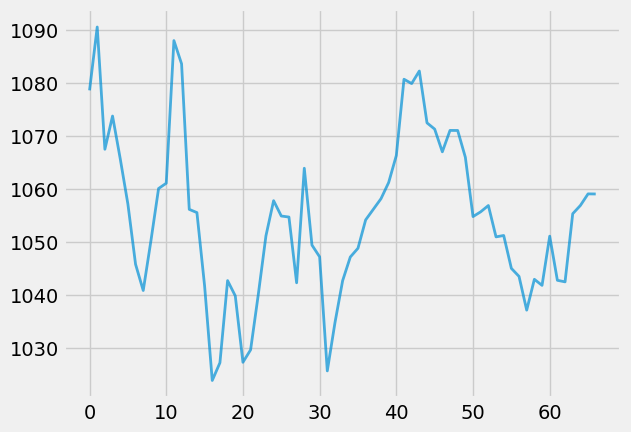

In [225]:
plt.plot(X_test_pred, label = 'X train Predict', lw=2,  alpha=.7)

In [226]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


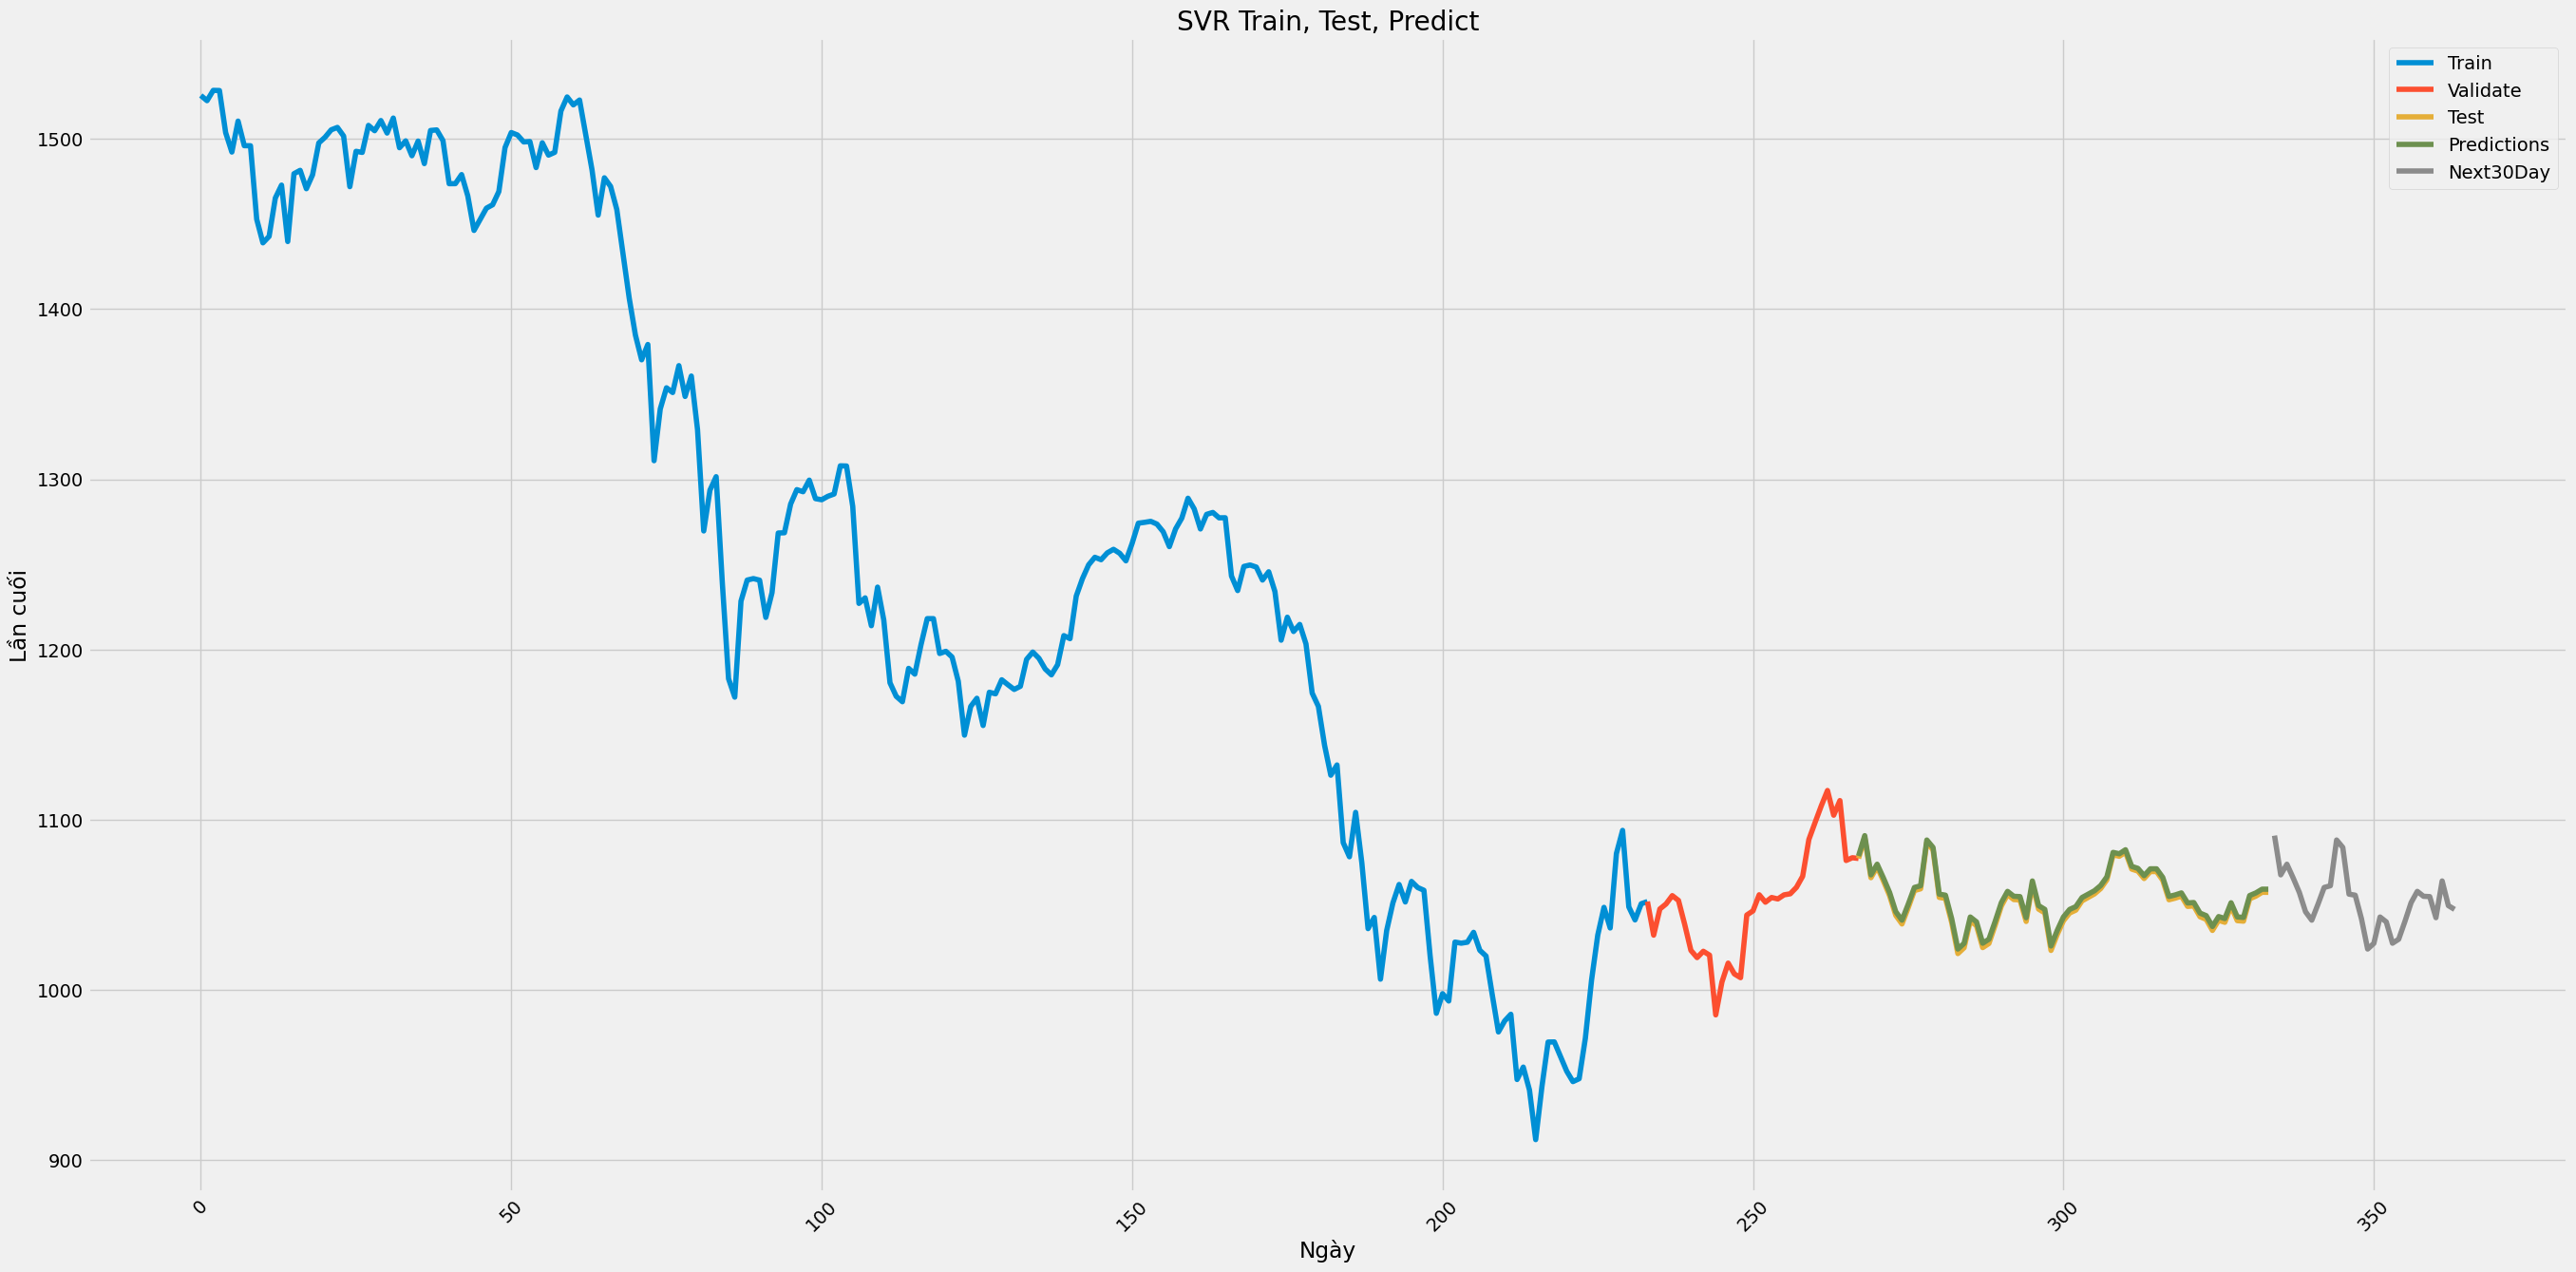

In [227]:
X_test_pred = X_test_pred.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)

plt.figure(figsize=(30,15))
plt.grid(True)

last_30_days = last_30_days.reshape(-1, 1)
Xtrainplot = np.concatenate([X_train,X_val[:1]])
Xvalplot = np.concatenate([X_val,X_test[:1]])

# plt.plot( X, label = 'X train', lw=2)
plt.plot(index_X_train, Xtrainplot, lw=4)
plt.plot(index_X_val, Xvalplot, lw=4)
plt.plot(index_X_test, X_test, lw=4)
plt.plot(index_X_test, X_test_pred, lw=4)

plt.plot(last_data,lst_output, lw=4)

plt.title('SVR Train, Test, Predict')
plt.ylabel('Lần cuối')
plt.xlabel('Ngày')
plt.legend(['Train','Validate', 'Test', 'Predictions','Next30Day'])
plt.xticks(rotation=45)
plt.show()